In [105]:
import pickle
import datetime as dt
import matplotlib.pyplot as plt
import calendar
import collections
import numpy as np
import pandas as pd

# load your dataset here! it should be formatted as this notebook assumes, 
# and things should run without too much wrangling on your part!
# d = pickle.load(open('reddit_info_dict_final.pkl', 'rb'))

In [4]:
# unpacking the data we saved earlier
dt_created = d['dt_created']
authors = d['authors']
num_comments_all = d['num_comments_all']
upvote_ratios = d['upvote_ratios']
scores = d['scores']
titles = d['titles']
texts = d['texts']
comment_texts_all = d['comment_texts_all']
comment_authors_all = d['comment_authors_all']

In [11]:
# let's look at posting over time! 

# convert to a python datetime object
ts_created = [dt.datetime.fromtimestamp(d) for d in dt_created]

# get the minimum timestamp, so we can track days since the beginning of the dataset
min_ts = min(ts_created)

# this is a list of days since the beginning of the dataset
ts_created_days = [(d - min_ts).days for d in ts_created]

(array([24., 23., 29., 28., 34., 19., 26., 16., 14., 22., 32., 26., 25.,
        23., 17., 24., 32., 20., 24., 39., 17., 21., 25., 28., 23., 30.,
        26., 21., 25., 15., 31., 31., 29., 29., 28., 26., 18., 23., 35.,
        22., 11., 22., 14., 28., 24., 51., 21., 35., 27., 22., 21., 29.,
        33., 25., 29., 33., 15., 15., 28., 29., 21., 23., 23., 20., 21.,
        30., 22., 11., 22., 28., 24., 24., 28., 24., 31., 26., 16., 11.,
        24., 27., 38., 30., 28., 34., 21., 28., 29., 29., 33., 33., 21.,
        32., 28., 26., 22., 24., 34., 18., 29., 27., 24., 23., 31., 27.,
        32., 23., 26., 29., 25., 35., 23., 23., 29., 26., 24., 30., 27.,
        31., 30., 21., 34., 36., 32., 25., 23., 29., 20., 20., 41., 39.,
        36., 28., 29., 24., 25., 28., 31., 28., 19., 27., 24., 19., 26.,
        27., 33., 19., 25., 21., 23., 34., 25., 13., 19., 19., 13., 16.,
        34., 32., 28., 23., 31., 23., 11., 28., 21., 38., 29., 27., 18.,
        31., 19., 27., 25., 28., 23., 17., 15., 19.

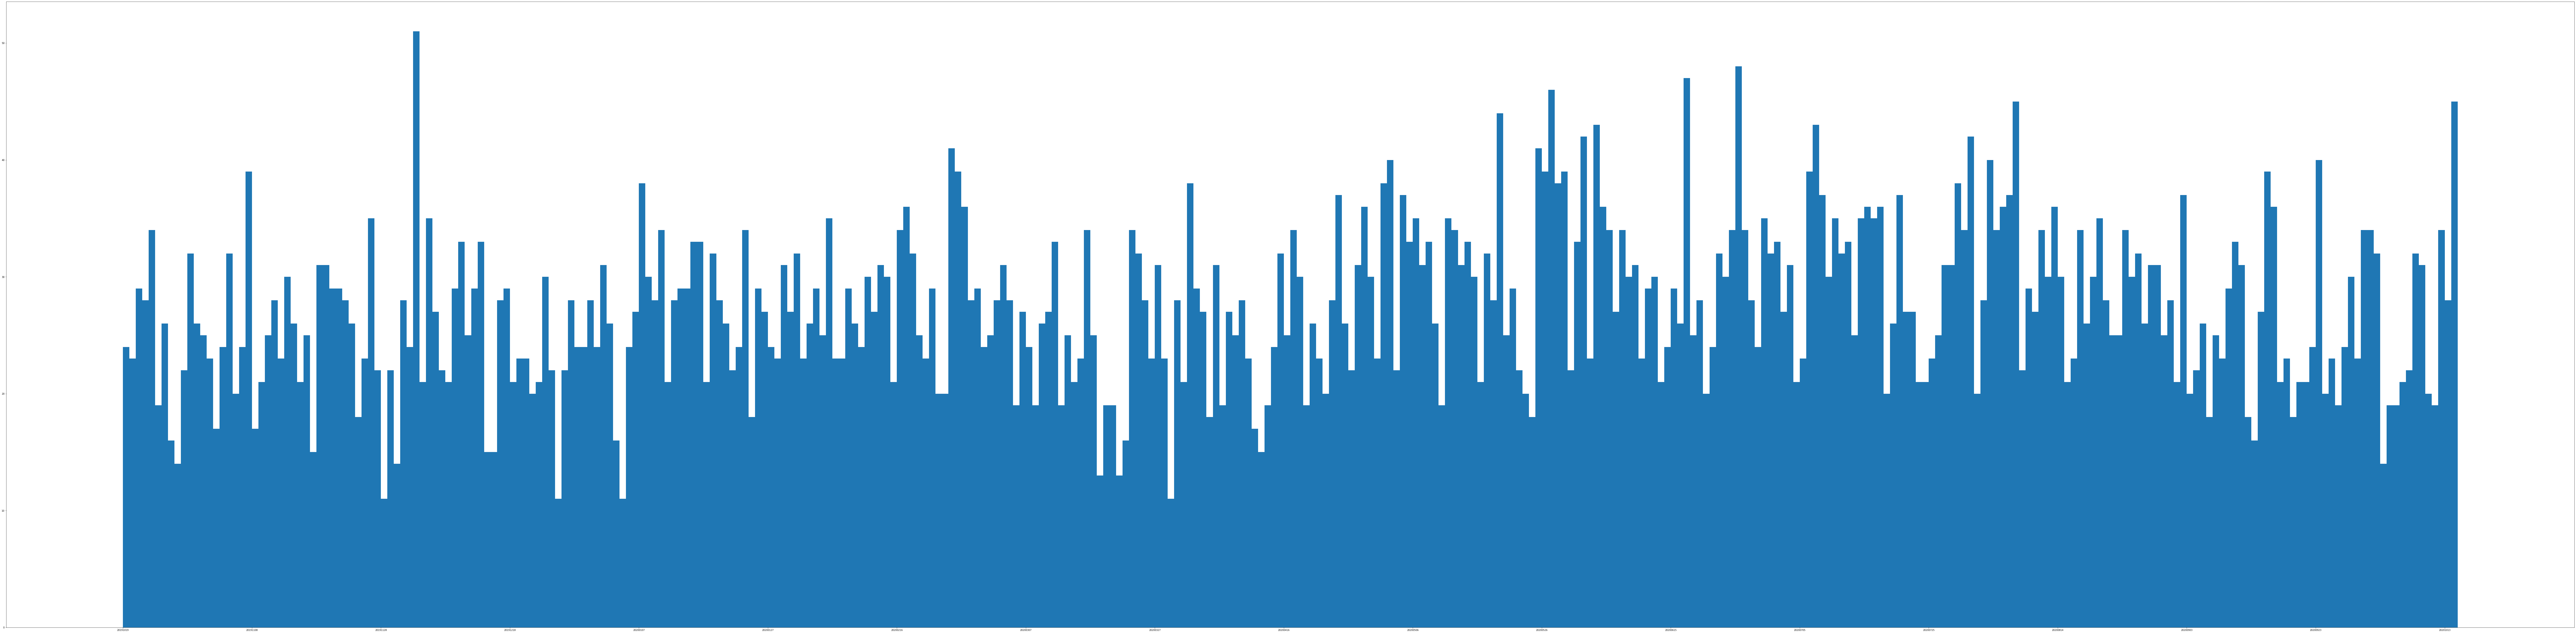

In [32]:
# now we want the range of days so that we can make a proper histogram.
range_of_days = max(ts_created_days) - min(ts_created_days)

# make this larger - it's going to be a big timeline!
plt.rcParams["figure.figsize"] = (200,50)

# how does posting change over time? let's take a look:
plt.xticks(ticks=[r for r in range(range_of_days)][::10], labels=[dt.datetime.strftime((min_ts + dt.timedelta(days=r)), '%Y%m%d') for r in range(range_of_days)][::20])

plt.hist(ts_created_days, bins=range_of_days)

# absent some context or aggregation of data, this likely doesn't really show much!


(array([1545., 1538., 1572., 1474., 1454., 1149., 1197.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <BarContainer object of 7 artists>)

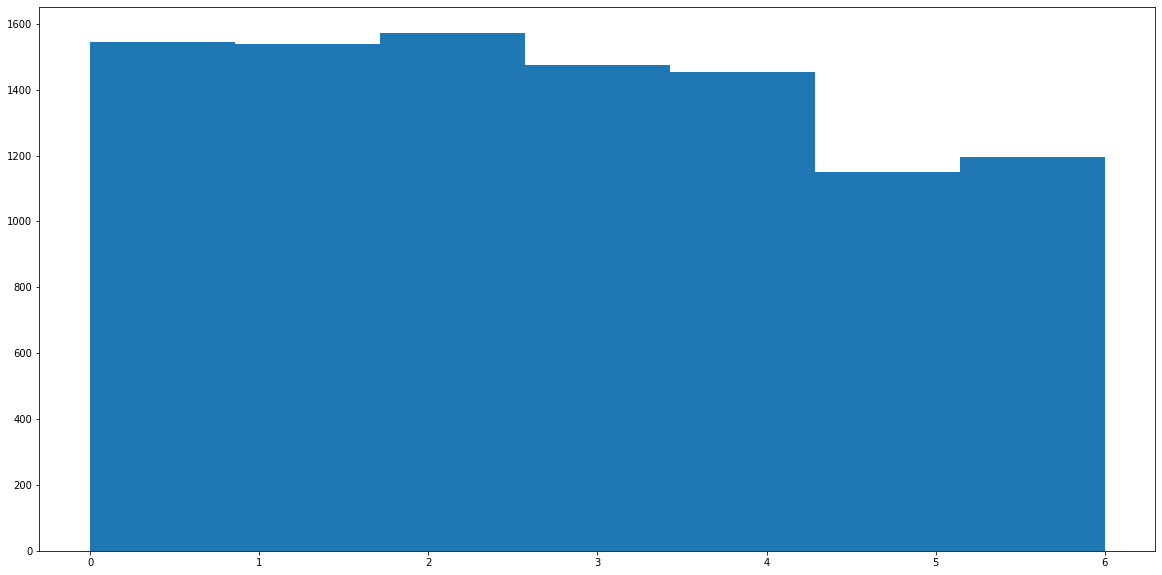

In [79]:
# so let's try something different:
ts_created_dayofweek = [d.weekday() for d in ts_created]
ts_created_dayofmonth = [d.day for d in ts_created]
ts_created_month = [d.month for d in ts_created]
# wow! a blob!
plt.hist(ts_created_dayofweek, bins=7)

In [93]:
def plot_a_range_of_values(list_of_values, n_bins, labels, zero_index=True):
    """
    Given a list of values (say, day of week or month of year) for a bunch of events,
    plots a histogram of their values, given by n_bins. 
    Ideally n_bins is the number of possible values found in our list of values.
    
    inputs:
    list_of_values: list of integer values (e.g. day of week or month of year) for a bunch of events. 
    n_bins: number of bins we are using. integer; should be the number of possible values in list_of_values.
    labels: the labels we want to see on our x-axis (names of days/months, days of a month). list of str or ints.
            if the string 'auto', we let matplotlib set its own labels.
    zero_index: if True (e.g. months, days of week), we assume our bins start at 0. 
                if False (e.g. day of month), our bins start at 1.
    """
    if labels == 'auto':
        plt.hist(list_of_values, bins=n_bins, rwidth=0.75, align='left')
    else:
        if zero_index:
            ticks_min = 0
            ticks_max = n_bins
            
        else:
            ticks_min = 1
            ticks_max = n_bins + 1
            
        plt.xticks(ticks=range(ticks_min, ticks_max), labels=labels)
        plt.hist(list_of_values, bins=range(ticks_min, ticks_max + 1), rwidth=0.75, align='left')


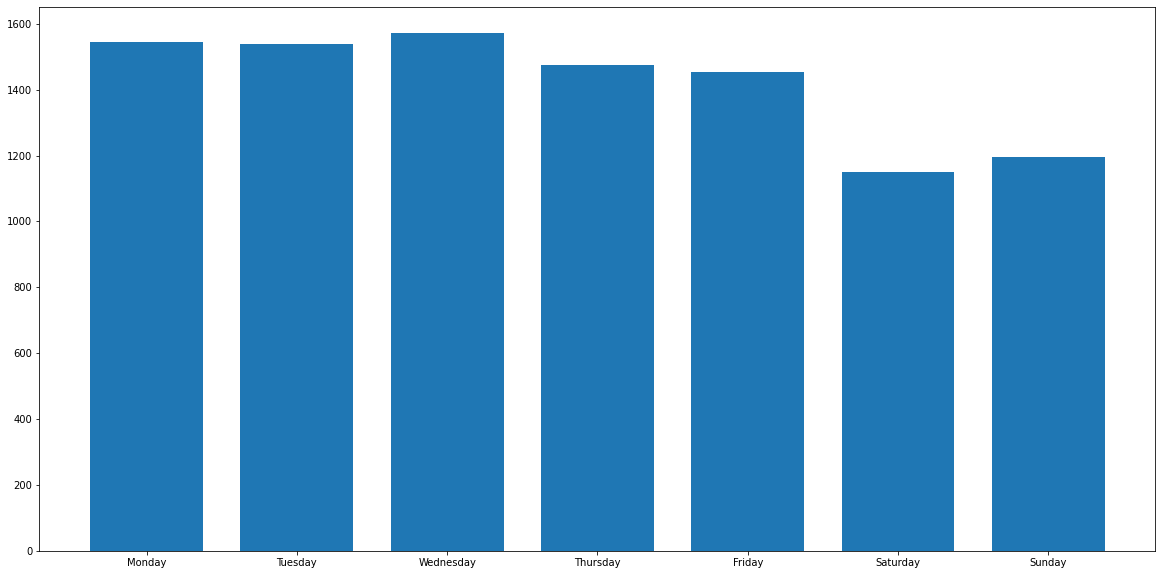

In [77]:
# let's do better - let's look at weekly posting patterns to start. 
plt.rcParams["figure.figsize"] = (20,10)

# does this look like what you expected? why or why not?
labels = [calendar.day_name[i] for i in range(7)]
plot_a_range_of_values(ts_created_dayofweek, 7, labels)


1


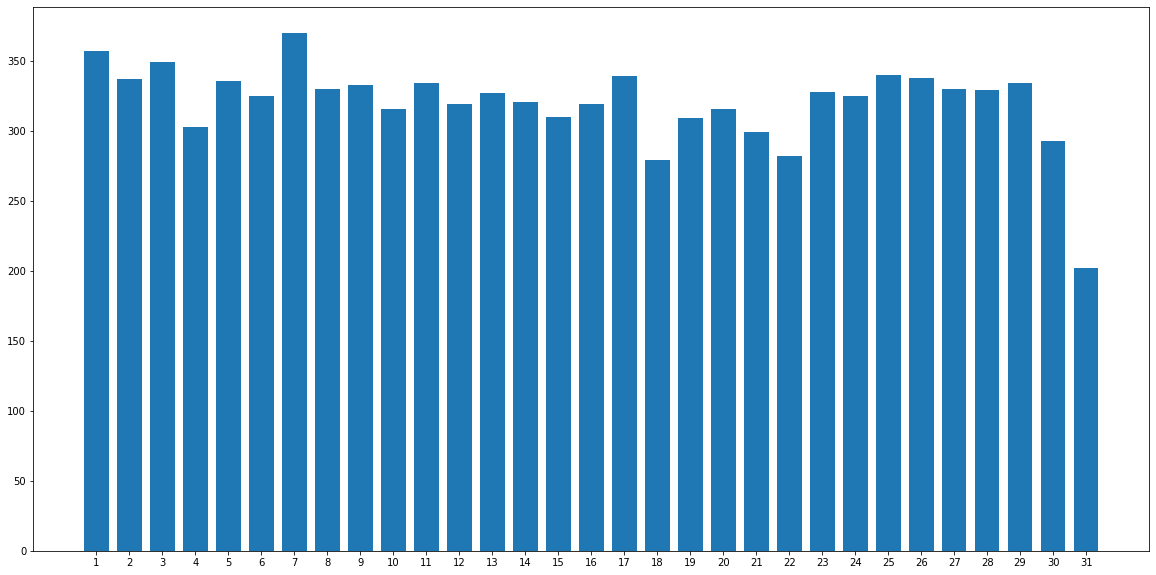

In [78]:
# ok, now let's look at day of month:
# does this look like what you expected? why or why not?
plot_a_range_of_values(ts_created_dayofmonth, 31, [r  for r in range(1, 32)], zero_index=False)

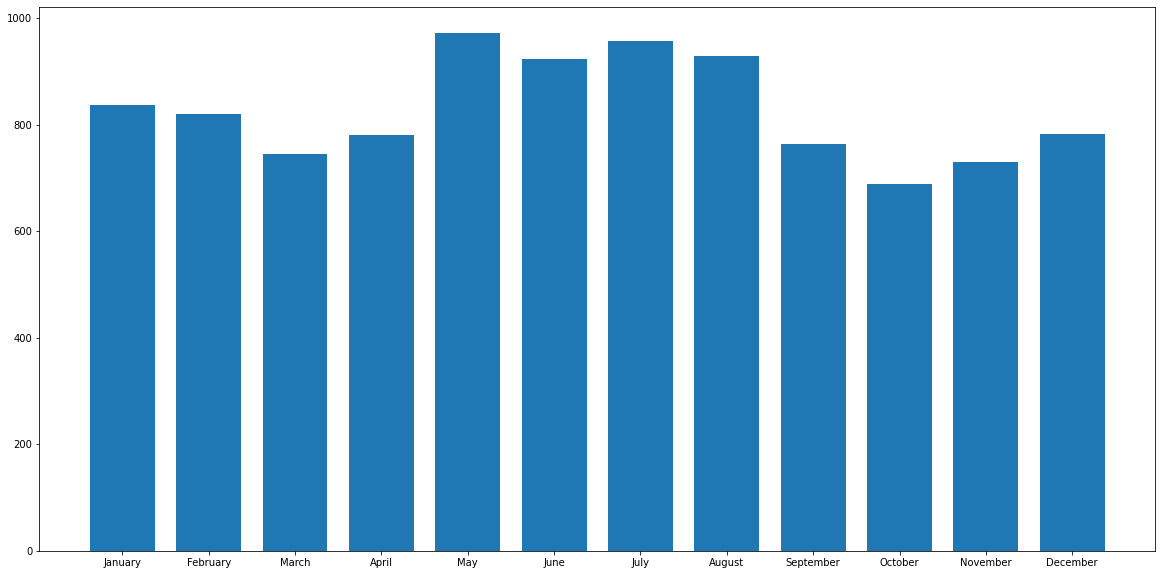

In [84]:
# and now month of year.
labels = [calendar.month_name[i] for i in range(1, 13)]
plot_a_range_of_values(ts_created_month, 12, labels, zero_index=False)

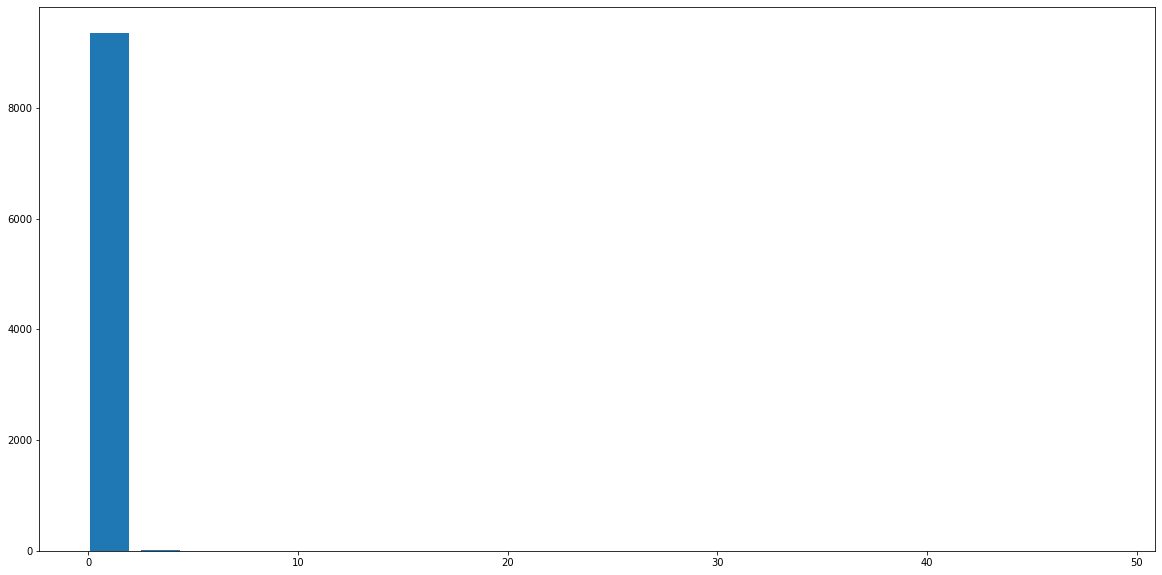

In [99]:
# so we have some time-based data. what else can we explore? 
# let's look at users - can we get the number of posts each user has made?

# collections.Counter will count the number of times each value appears in a list.
# this is super handy for figuring out how often someone shows up in a dataset, for example.
author_counts_by_name = collections.Counter(authors)

# is the subreddit dominated by a small set of posters, or does everyone post about the same amount?
author_post_count = author_counts_by_name.values()


# look! it's an old friend!
# this time we're not going to be predicting our own labels though!
plot_a_range_of_values(author_post_count, 20, labels='auto', zero_index=True)

# if your data is like my data, you're probably going to see a huge spike at 1, and not much else. 

Counter({1: 8931, 2: 385, 3: 36, 4: 12, 5: 3, 50: 1, 7: 1})


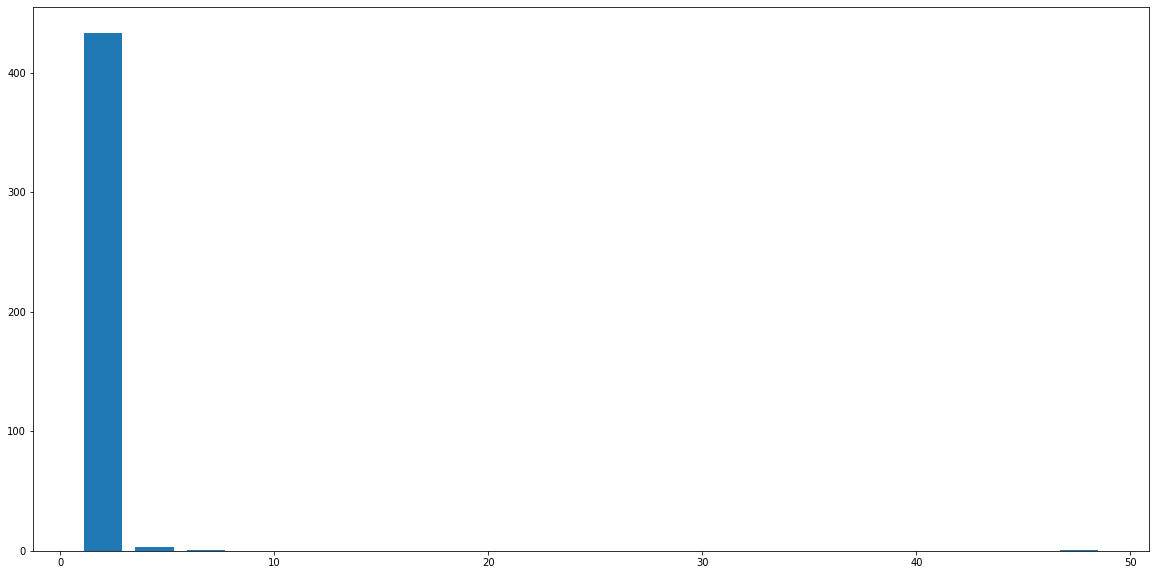

In [103]:
# let's figure out how to zoom in on the long tail.
plot_a_range_of_values([a for a in author_post_count if a > 1], 20, labels='auto', zero_index=True)

# or, even more simply:
print(collections.Counter(author_counts_by_name.values()))

# can you think of a better way to visualize your result?


In [106]:
# now for a little bit of natural language processing and pandas!
keyword = 'facebook'

df = pd.DataFrame({'title': titles, 'texts': texts, 'ts': ts_created})


In [107]:
df.head(5)
# lil dataframe!!


,title,texts,ts
0,"Ex holding on to my Netflix account, demanding...",[deleted],2020-10-14 23:23:35
1,Need help with fender bender car accident,My son just had an accident in front of me. Pr...,2020-10-14 23:45:08
2,Victim of medial billing fraud and lying to in...,"This all happened in Los Angeles, CA. When my ...",2020-10-15 00:31:49
3,Scammed by car dealership and car needs 14k in...,(this is copy pasted from my other posts. sorr...,2020-10-15 01:55:19
4,Is this sexual behavior illegal in CA?,[deleted],2020-10-15 02:23:41


In [109]:
# we want to make sure we can do keyword search fairly well! 
# keep in mind that searching like this might be slower for large datasets; 
# you may want to look into solutions like elasticsearch or parallel computing if your dataset is huge!

# lambda expressions are like little mini functions. 
# they're really handy when you want to do a function on a column and get a column back that aligns with your previous column.
df['combined_text_lowercase'] = df.apply(lambda x: x.title + x.texts, axis=1)
df['{}_present'.format(keyword)] = df['combined_text_lowercase'].apply(lambda x: keyword in x)

In [110]:
# wow, more columns!
df.head(5)


,title,texts,ts,combined_text_lowercase,facebook_present
0,"Ex holding on to my Netflix account, demanding...",[deleted],2020-10-14 23:23:35,"Ex holding on to my Netflix account, demanding...",False
1,Need help with fender bender car accident,My son just had an accident in front of me. Pr...,2020-10-14 23:45:08,Need help with fender bender car accidentMy so...,False
2,Victim of medial billing fraud and lying to in...,"This all happened in Los Angeles, CA. When my ...",2020-10-15 00:31:49,Victim of medial billing fraud and lying to in...,False
3,Scammed by car dealership and car needs 14k in...,(this is copy pasted from my other posts. sorr...,2020-10-15 01:55:19,Scammed by car dealership and car needs 14k in...,False
4,Is this sexual behavior illegal in CA?,[deleted],2020-10-15 02:23:41,Is this sexual behavior illegal in CA?[deleted],False


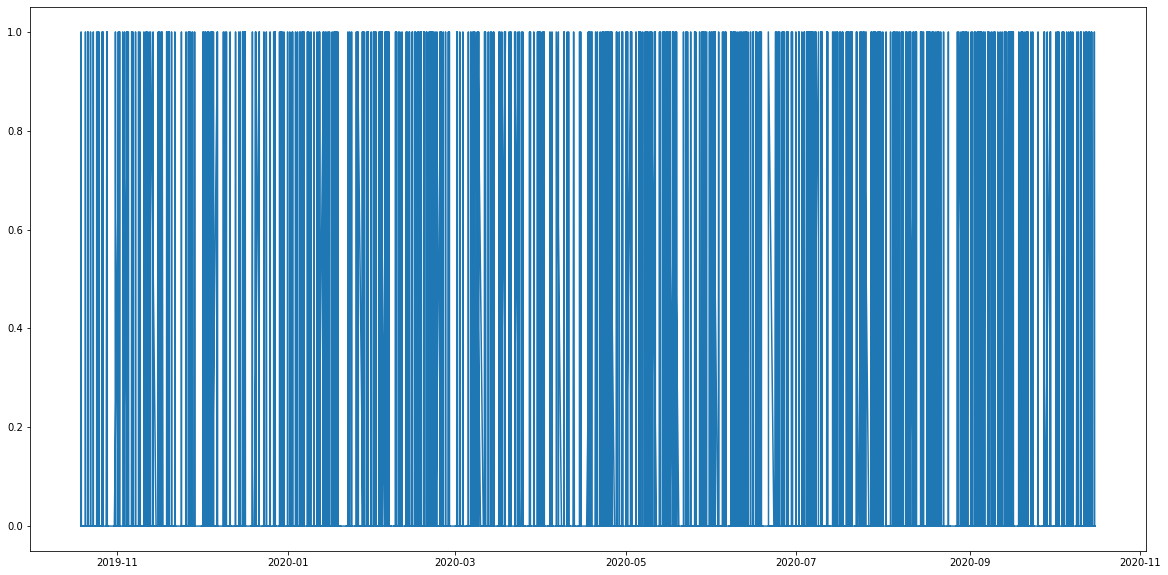

In [113]:
# let's try another small task: how often is your keyword mentioned over time?
# if we plot it right now, what will happen?

plt.plot(df['ts'], df['facebook_present'])
# not quite what we wanted, right? 

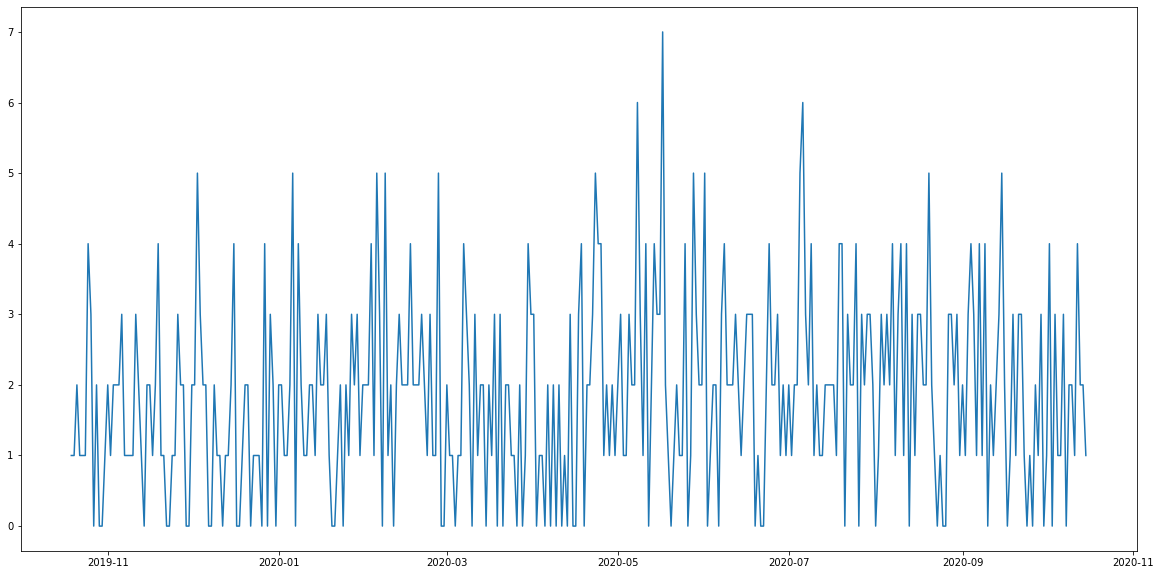

In [115]:
# let's group by day - that's a manageable grouping.
# first, let's round to the nearest day.
df['date_ts'] = df['ts'].apply(lambda b: b.date())

# now we need to group. 
grouped_by_date_ts = df.groupby('date_ts')


dates = []
num_keyword_mentions = []
for date_ts, gr in grouped_by_date_ts:
    num_keyword_mentions.append(gr['{}_present'.format(keyword)].sum())
    dates.append(date_ts)
    
plt.plot(dates, num_keyword_mentions)
# what does this tell us about trends in the subreddit? what happens if we superimpose two lines? 
# can you make a function that does all the stuff we just did?

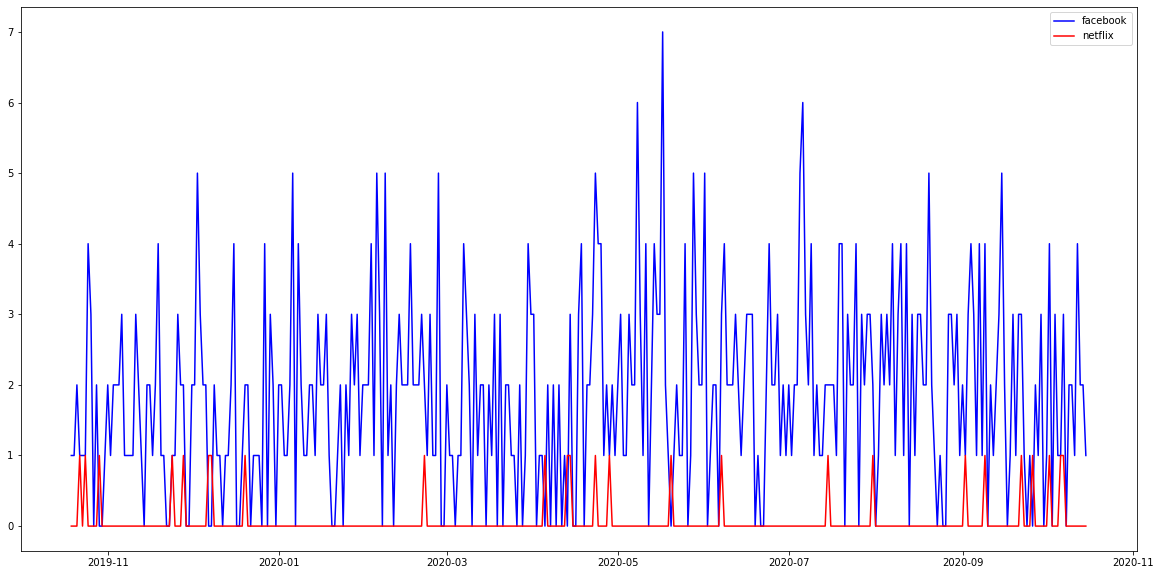

In [117]:
keyword2 = 'netflix'
df['{}_present'.format(keyword2)] = df['combined_text_lowercase'].apply(lambda x: keyword2 in x)

dates = []
num_keyword_mentions = []
num_keyword2_mentions = []

grouped_by_date_ts = df.groupby('date_ts')
for date_ts, gr in grouped_by_date_ts:
    num_keyword_mentions.append(gr['{}_present'.format(keyword)].sum())
    num_keyword2_mentions.append(gr['{}_present'.format(keyword2)].sum())
    dates.append(date_ts)
    
plt.plot(dates, num_keyword_mentions, color='blue', label='facebook')
plt.plot(dates, num_keyword2_mentions, color='red', label='netflix')
plt.legend()

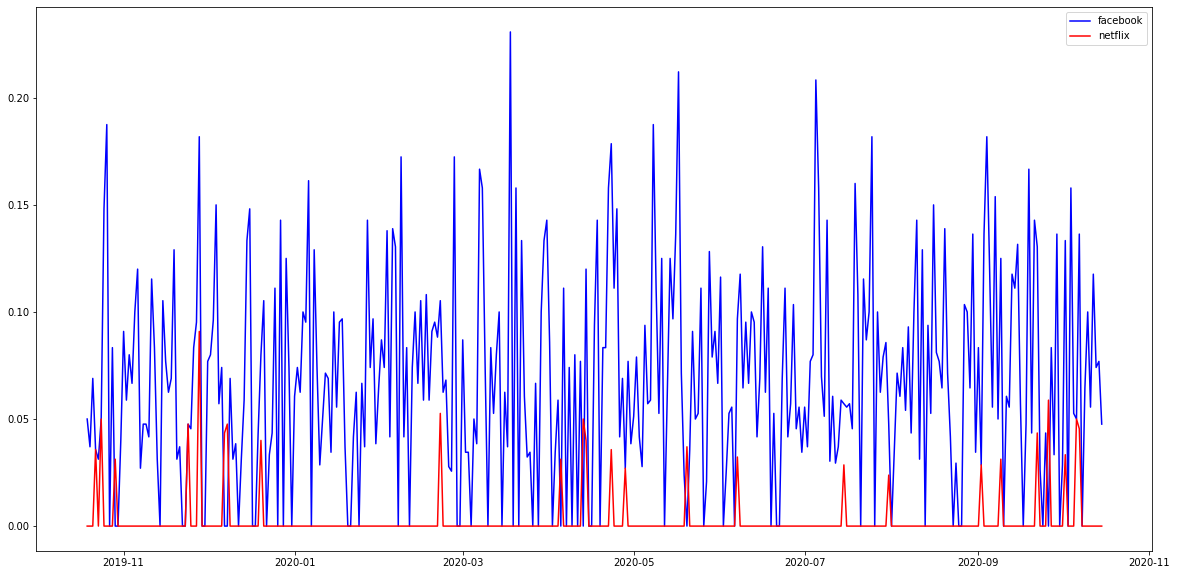

In [119]:
grouped_by_date_ts = df.groupby('date_ts')

# maybe traffic was just up on a day that you saw a spike - how can we remedy that?
# fraction of posts!
num_keyword_mentions_fractional = []
num_keyword2_mentions_fractional = []
dates = []
for date_ts, gr in grouped_by_date_ts:
    num_keyword_mentions_fractional.append(gr['{}_present'.format(keyword)].sum() / gr['{}_present'.format(keyword)].count())
    num_keyword2_mentions_fractional.append(gr['{}_present'.format(keyword2)].sum() / gr['{}_present'.format(keyword2)].count())
    dates.append(date_ts)
    
plt.plot(dates, num_keyword_mentions_fractional, color='blue', label='facebook')
plt.plot(dates, num_keyword2_mentions_fractional, color='red', label='netflix')
plt.legend()

In [137]:
# let's make another dataframe of authors & how many posts they made!
author_df = pd.DataFrame({'author': author_counts_by_name.keys(), 'post_counts': author_counts_by_name.values()})
print(author_df.head(5))
df['author'] = authors
df['author'] = df['author'].astype('str')
author_df['author'] = author_df['author'].astype('str')
print(df.head(5))

# now what happens if we join this to our existing dataframe?
df_merged = df.merge(author_df, how='left', on='author')

                 author  post_counts
0         delwarmalarky            1
1        DAVID1111YOUNG            1
2             flyzapper            1
3  StevieSteveStephens_            1
4         Due_Worker111            1
                                               title  \
0  Ex holding on to my Netflix account, demanding...   
1          Need help with fender bender car accident   
2  Victim of medial billing fraud and lying to in...   
3  Scammed by car dealership and car needs 14k in...   
4             Is this sexual behavior illegal in CA?   

                                               texts                  ts  \
0                                          [deleted] 2020-10-14 23:23:35   
1  My son just had an accident in front of me. Pr... 2020-10-14 23:45:08   
2  This all happened in Los Angeles, CA. When my ... 2020-10-15 00:31:49   
3  (this is copy pasted from my other posts. sorr... 2020-10-15 01:55:19   
4                                          [deleted] 2020-10-

In [141]:
df_merged['post_counts'].value_counts()
# what kind of user makes up most of the posts?

1     8931
2      770
3      108
50      50
4       48
5       15
7        7
Name: post_counts, dtype: int64

In [ ]:
# what else do you want to know about your data?